# Business Understanding: 機械学習の価値を計算する

## なにをするのか

**プロダクトの顧客が理解できる言葉で、機械学習後の価値が定義されている**ことがBusiness Understandingのゴールです。

例: フリーマーケットのサービスの場合

**購入ユーザー**として、(特定カテゴリだけでなく)**すべての商品カテゴリで正規品のみを閲覧したい**。

Point

* 主語をユーザーにし、ユーザーへリリースする時の文面を意識して記述する。
* 機械学習を導入する前と後のユーザー体験の差にフォーカスする。
* 価値の実現方法が機械学習でなくても成立するようにする。

機械学習後の価値を**計算式で表す**ことが重要です。フリーマーケットのサービスの例では次のような式です。

* 機械学習の価値/日 = (すべてのカテゴリのチェックに必要な人数 – 機械学習を導入した場合に必要な人数) × 1日のチェック時間 x 時給 

もちろん、最初から機械学習を導入したらどれぐらいの人数でチェックができるのか、開発や運用にいくらかかるのかは不確実です。プロジェクトでのプロトタイピング(PoC)を通じて、見積りの不確実性を減らしていきます。

## なぜやるのか

**機械学習で目標精度が達成できないことを、失敗に直結させないため**です。[機械学習活用プロジェクトの80%は失敗するといわれています](https://research.aimultiple.com/ai-fail/)。様々な会社が失敗確率の高さに言及しています。

1. Gartner
   * 2022年までに85%のAI活用プロジェクトが失敗すると予想: [Gartner Says Nearly Half of CIOs Are Planning to Deploy Artificial Intelligence](https://www.gartner.com/en/newsroom/press-releases/2018-02-13-gartner-says-nearly-half-of-cios-are-planning-to-deploy-artificial-intelligence)
2. Boston Consulting Group, MIT Sloan Management Review
   * 2021年の調査で、わずか1割の企業のみがAIにより財務上の利益を実現している: [AIにより一定以上の財務上の利益を実現している組織はわずか1割](https://www.bcg.com/ja-jp/press/18february2021-expanding-ai-impact-with-organizational-learning)
3. Transform 2019
   * データサイエンスプロジェクトの87%は失敗する: [Why do 87% of data science projects never make it into production?](https://venturebeat.com/2019/07/19/why-do-87-of-data-science-projects-never-make-it-into-production/)

失敗する理由のTop5は次の通りです。

1. ビジネスの目標がはっきりしていない
2. データの品質が不十分
3. プロジェクトのスポンサーが不在
4. チーム間の連携が不十分
5. データサイエンティストなどの専門職の不在

計算式を作ることでプロダクトの価値を顧客に届けるための関係者と目標値を明確にすることができ、特に1と4の失敗する理由を抑制することができます。

例えばフリーマーケットサービスで偽物をチェックするのに機械学習を導入するプロジェクトの場合、「機械学習モデルの精度が思うように上がらず、当初は機械学習導入後2人でよいと見込んでいたが10人は必要そう・・・」となった場合失敗でしょうか?

数式から影響を可視化してみましょう。

In [1]:
import numpy as np
import pandas as pd


def estimate(before_workers, before_worktime,
             after_workers, after_worktime,
             hourly_pay):
    """
    経過日数を引数に、機械学習の価値を計算する関数を作成する関数。

    Parameters
    ----------
    before_workers : int
        機械学習を導入しない場合の人数
    before_worktime : float
        機械学習導入前の1日のチェック時間
    after_workers : int
        機械学習導入後の人数
    after_worktime : float
        機械学習導入後の1日のチェック時間
    hourly_pay : int
        チェック担当者の時給(円/時)
    """
    _hourly_pay = hourly_pay / 10000  # 万円単位の時給を計算
    def _estimate(days):
        value = ((before_workers * before_worktime) - (after_workers * after_worktime)) * _hourly_pay * days
        return value

    return _estimate


def visualize_return(estimate_func, development_cost, operation_cost):
    """
    投資が回収できる日数を可視化する。

    Parameters
    ----------
    estimate_func : func
        経過日数時点での機械学習の価値を計算する関数
    development_cost : int
        機械学習の開発費用
    operation_cost: int
        機械学習の運用費用(万円/月)
    """

    daily_operation_cost = operation_cost / 30  # 日ごとの運用費を計算

    days = np.arange(0, 365 * 3)
    value = pd.Series([estimate_func(d) - operation_cost * d - development_cost for d in days])
    ax = value.plot.line()
    ax.axhline(y=0, color='black', linestyle='--')





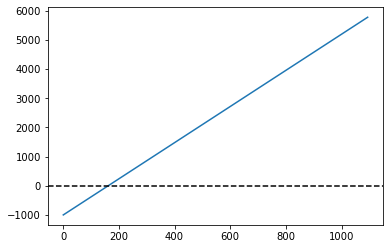

In [2]:
initial_estimate_func = estimate(
    before_workers=20,
    before_worktime=7.5,
    after_workers=2,
    after_worktime=7.5,
    hourly_pay=1200)


visualize_return(initial_estimate_func, development_cost=1000, operation_cost=10)

2人でできるようになるという最初の見積もりでは、200日より前に投資額を回収できる見込みでした。

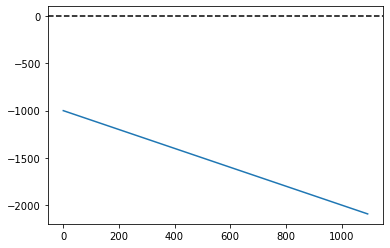

In [3]:
second_estimate_func = estimate(
    before_workers=20,
    before_worktime=7.5,
    after_workers=10,
    after_worktime=7.5,
    hourly_pay=1200)


visualize_return(second_estimate_func, development_cost=1000, operation_cost=10)

10人しか減らせないとなると、運用費の10万/月を上回ることができず赤字になってしまいます。この状態では失敗といえるでしょう。

しかし、モデルをチェックする部署と協議し、10人は必要でもチェック時間は2時間/日に減らせるとわかったらどうでしょう。

*Exercise: 他にどんなパラメーターが調整されれば当初予定された期間で投資額が回収できるか試してみましょう。*

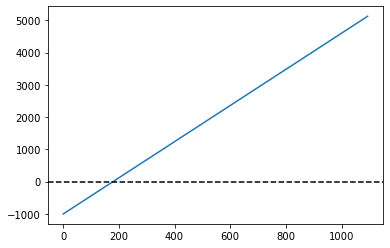

In [4]:
second_estimate_func = estimate(
    before_workers=20,
    before_worktime=7.5,
    after_workers=10,
    after_worktime=2,
    hourly_pay=1200)


visualize_return(second_estimate_func, development_cost=1000, operation_cost=10)

計算結果を見ると、当初想定した効果と同程度の効果が得られています。

**プロダクトの価値は機械学習のチームだけで実現するのではありません。** 計算式を書くことで、どの値にどの部署が責任を持つのかがクリアになります。

* チェック担当者の数(`after_workers`)、チェック時間(`after_worktime`): チェック担当チーム
* チェック担当者の単価(`hourly_pay`): 採用チーム
* 運用費(`operation_cost`): システム運用チーム

多くの場合、機械学習モデルの精度は達成できるか不確実です。計算式を通じて目標を達成するための関係者を明らかにすることで、目標精度の達成可否がプロジェクト成否に直結することを回避できます。

## どうやるのか

プログラミング演習では機械学習プロジェクトの例3つについて計算式を作る演習を行います。  
コミュニケーション演習では、価値計算の方向性を決めるために行うべきコミュニケーションの演習を行います。

### プログラミング演習

1. 飲料メーカーA社での機械学習プロジェクト
2. 道路のひび割れを検出する機械学習プロジェクト
3. ゲームのチャット欄における誹謗中傷コメント検知

#### 事例1: 飲料メーカーA社での機械学習プロジェクト

「製造担当者として、飲料を入れる瓶が割れてしまっていないかどうか効率的に検品したい。現状は人手で検品しており、コスト・時間がかかり検品精度にばらつきもある。機械学習でできるだけ自動化したい。また検品精度も向上させたい。」

このようなプロジェクトへの要件がある場合、どのような計算式で価値を定義すべきでしょう?

**回答例**

漏れ・重複のない観点から価値の計算を行うことが考えられます。たとえば、QCDの観点で3つ計算式を考えることができます。

* (Quality: 品質) 製造後の工程(出荷や販売)におけるクレームの数
   * 機械学習のQの価値=(Beforeのクレーム数 – Afterのクレーム数) x 損失額
* (Cost: コスト) 検品コスト
   * 機械学習のCの価値=(Beforeの検品人数– Afterの検品人数) x 時間 x 時給
* (Delivery: 納期) 検品時間
   * 機械学習のDの価値=Beforeの時間 – Afterの時間

#### 事例2: 道路のひび割れを検出する機械学習プロジェクト

「道路点検の担当者として、道路のひび割れの見逃しをなくしたい。点検は車からの目視で行っており、熟練度によってひび割れが検出できる数に差異がある。熟練とまではいかなくても、そこそこの人員の代替になれば活用しコスト削減につなげたい。」

このようなプロジェクトへの要件がある場合、どのように条件と計算式を定義すべきでしょう?

**回答例**

どの程度の検出数であれば価値を達成できるか、人間の上限と下限の能力値を目安に機械学習の達成目標を設定することが考えられます。

* 導入基準: 「そこそこの人員の代替」
   * 素人の検出数 < モデルの検出数 < 玄人の検出数
* 検出コスト
   * 機械学習の価値= (Before担当者数 – After担当者数) x 時間 x 時給

※検出コストは、瓶の検品と基本的に同じです。

#### 事例3: ゲームのチャット欄における誹謗中傷コメント検知

「ゲーム運営の担当者として、誹謗中傷となるようなコメントを100%の精度で検知したい。誹謗中傷となるコメントが放置されると、ゲームプラットフォーム側からゲームの配信そのものが停止され停止期間中に大きな損害が出るため。現状は人が目視してチェックしているが、配信しているタイトルすべてをくまなく見ていくには限界がある。」

このようなプロジェクトへの要件がある場合、どのように条件と計算式を定義すべきでしょう?

もう令和なので、機械学習で100%の精度が困難ということは多くのお客様がご存じです。ただ、それでも100%というのは
何かしらビジネス的な背景があるということです。単に無理といわずどのように実現できるか考えてみましょう。

**回答例**

機械学習モデル単品でなく、システム全体で100%を目指す構成とし、その中での貢献価値を算出する方法が考えられます。

![business_understanding_002.PNG](./images/business_understanding_002.PNG)

100%を目指す場合、最終的に人手で確認することは欠かせません。一方で、人が全部チェックすることは現実的ではありません。
限られた人員が最終チェックを行ってくれるとして、チェックする担当の方にインプットすべき情報を作るのに機械学習を使うことが考えられるでしょう。
この時、機械学習モデルの価値はインプットすべき情報、つまり資料の価値計算に置き換えられます。

このように、機械学習を含むシステム全体で評価をするとき機械学習の価値はシステム全体の中で担う役割の価値となります。

### コミュニケーション演習

プログラミング演習で次の事例で価値の計算を行いました。

1. 漏れ・重複がない観点から価値の計算を行う(例: QCD)。
2. 人間の上限と下限の能力値から機械学習の導入基準を設定する。
3. 機械学習モデル単品でなく、システム全体で100%を目指す構成とする。その中でのオペレーション価値を算出する。

価値計算を行う際、誰に何を依頼すべきでしょうか?

ロールの種別

| 英語名             | 日本語名                   | 役割                                                                 |
|--------------------|----------------------------|------------------------------|
| Product Manager    | プロダクトマネージャー     | ユーザー体験を向上させるために実装すべきソフトウェア機能を定義する。 |
| Business Analyst   | ビジネスアナリスト         | 解決すべきビジネス上の問題を定義する                                 |
| Data Analyst       | データアナリスト           | データの可視化と分析で問題を定量的に特定する。                       |
| Architect          | アーキテクト               | ソフトウェアアーキテクチャ全体を設計する。                           |
| DevOps Engineer    | DevOpsエンジニア           | ソフトウェアの開発・運用プロセスを自動化する。                       |
| Software Engineer  | ソフトウェアエンジニア     | ソフトウェアの開発を行う。                                           |
| Operator           | 業務担当者                 | ソフトウェアを利用し業務を行う。                                     |
| System Admin       | システム管理者             | サービスの挙動を監視する。                                           |
| IT Auditor         | IT監督者                   | システムや会社全体の権限管理や監査を行う。                           |
| Data architect     | データアーキテクト         | データを管理する基盤を設計、運用する。                               |
| Domain Expert      | 業務有識者                 | 深い業務知識を持ちデータの意味やあるべき状態について定義する。       |
| Data Scientist     | データサイエンティスト     | 機械学習モデルを開発する。                           |

依頼の種別

* 情報共有: 開発に必要な情報/ドキュメントの提供を依頼する
* 作業: 開発に必要な作業を分担(依頼)する
* レビュー: 作業の確度を上げるため/承認を得るためレビューを依頼する

![communication](images/communication.PNG)

#### ビジネスチームへの依頼例

Product ManagerとDomain Expertに対して次のような依頼をするとよいでしょう

* 情報共有の依頼
   * どの観点を優先すべきかの方向性(Q優先/C優先/D優先)。道路のひび割れ検知の場合、Q優先なら動画のフレームごとに判定を行い見逃しを防ぐ、D優先ならドローンを飛ばしてざっと撮った空撮の画像から手早く判定するなど、アプローチも変わってくる。
   * 機械学習導入後のユーザー体験、業務フローについての方向性。適用範囲を限定することでモデルの精度を向上させ無人化を目指すか、人手が残る前提でモデルは見逃しを防止に注力するか。
* 作業
   * **上位のステークホルダー(スポンサー)との合意**
* レビュー
   * 価値計算式のレビュー・承認

上位のステークホルダーとの合意はとりわけ重要です。プロジェクトで成果を出せたと思ったら社長にひっくり返されたなんてことは避けたいものです。

#### システム管理チーム

System AdminとIT Auditorに対して次のような依頼をするとよいでしょう

* 情報共有の依頼
   * 過去のシステム開発投資の資料(開発費・運用費の目安にするため)
   * 開発/運用を委託しているパートナー、また調達先


## 大切なこと: あきらめない心

投資合理性があってもステークホルダーを説得できるとは限りません。

* 現場で発言権を持つ業務エキスパートが機械学習モデルを信用しない。
* システム関連予算から開発費を捻出できない。
* (既存の開発/運用委託先が機械学習を扱えないため)新規パートナーと契約を締結することへの忌避感。
* 既存システムが蜜結合であり、機械学習を組み込むことが困難。

主語にしたユーザーを切り替えることで新たな価値にピボットし、ステークホルダーに刺さる切り口で再度アプローチするのは有効な手段です。

例: 道路点検の場合
* 最終的なユーザーを「道路点検の品質管理者」から「道路の保守点検を依頼する自治体」に切り替えると、「自治体として、道路の補修計画を立てるために迅速にひび割れの多い/少ない箇所を特定したい」という価値定義ができるかもしれない。
* ひび割れ検出という技術はそのままで、対象を衛星画像など広域の写真にすることで新たな提案が可能になる。

## AWS Empowerment

AWSではお客様の機械学習へのビジネス適用を検討するためのプログラムを用意しています。

* [ML Discovery Workshop](https://aws.amazon.com/jp/blogs/news/aws-reinvent-recap-aiml-seminar-for-biopharma/)
  * お客様のビジネス課題に対しAI/MLの適用可否と難易度を発見するワークショップ。アマゾンの代表的なイノベーションメカニズムである「ワーキングバックワーズ（Working Backwords）」の５つの質問などを用い機械学習のユースケースを特定する。(リンクはAstra Zeneca様の事例)
* [Amazon Machine Learning Solutions Lab](https://aws.amazon.com/jp/ml-solutions-lab/)
  * AWSの機械学習エキスパートと連携し、モデル開発を含めたMVPを短期間で開発する。

## Next Step

[Analyze](02_analyze.ipynb)

## References

1. Cem Dilmegani. [4 Reasons for Artificial Intelligence (AI) Project Failure in 2022](https://research.aimultiple.com/ai-fail/). 2022.
2. Gartner. [Gartner Says Nearly Half of CIOs Are Planning to Deploy Artificial Intelligence](https://www.gartner.com/en/newsroom/press-releases/2018-02-13-gartner-says-nearly-half-of-cios-are-planning-to-deploy-artificial-intelligence). 2018.
3. BCG. [AIにより一定以上の財務上の利益を実現している組織はわずか1割](https://www.bcg.com/ja-jp/press/18february2021-expanding-ai-impact-with-organizational-learning). 2021.
4. Transform 2019. [Why do 87% of data science projects never make it into production?](https://venturebeat.com/2019/07/19/why-do-87-of-data-science-projects-never-make-it-into-production/). 2019.
5. 木田浩理, 伊藤豪, 高階勇人 and 山田紘史. [データ分析人材になる。 目指すは「ビジネストランスレーター」](https://www.amazon.co.jp/dp/B08L4DQ311/ref=dp-kindle-redirect?_encoding=UTF8&btkr=1). 2020.
6. 有賀康顕, 中山心太 and 西林孝. [仕事ではじめる機械学習 第2版](https://www.amazon.co.jp/%E4%BB%95%E4%BA%8B%E3%81%A7%E3%81%AF%E3%81%98%E3%82%81%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92-%E7%AC%AC2%E7%89%88-%E6%9C%89%E8%B3%80-%E5%BA%B7%E9%A1%95/dp/4873119472). 2021.
7. 河本薫. [データ分析・AIを実務に活かす データドリブン思考](https://www.amazon.co.jp/dp/B09LQ8W13Y/ref=dp-kindle-redirect?_encoding=UTF8&btkr=1). 2022.
8. 藤井亮宏. [現場で活用するための機械学習エンジニアリング](http://xn--88jmw4a2gqcujwb5dyd3k9nxde6381meykn68cwlghtoc36a5dfiq2e/). 2021.
 